In [ ]:
from IPython import display
import time
import matplotlib.pyplot as plt
import numpy as np

from flappy_env import FlappyBirdEnv
from a2c import ActorCritic


if __name__ == '__main__':

    env = FlappyBirdEnv()

    actor_critic = ActorCritic([env.observation_shape], env.action_shape)

    actor_critic.actor = tf.keras.models.load_model('models/actor.h5')
    actor_critic.critic = tf.keras.models.load_model('models/critic.h5')

    total_rewards = []
    
    for episode in range(1800):
        try:
            print(f'In Episode {episode}')

            actor_critic.train_episode(env, 10000)
            total_rewards.append(actor_critic.current_reward)
            display.clear_output(wait=True)
            print(np.mean(total_rewards), np.mean(total_rewards[-10:]), max(total_rewards))   
            print(actor_critic.epsilon)
            
    
        except KeyboardInterrupt:
            plt.plot(list(range(len(total_rewards))), total_rewards)
            plt.show()
            actor_critic.actor.save('actor.h5')
            time.sleep(5)

    plt.plot(list(range(len(total_rewards))), total_rewards)
    plt.show()
    actor_critic.actor.save('actor.h5')

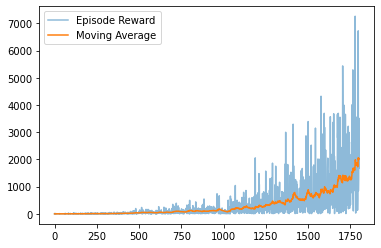

In [20]:
prev = 0
mva = []

k = 2 / (51)

for el in total_rewards:

    if prev != 0:
        pres = prev * (1 - k) + el * k
    else:
        pres = el
    prev = pres
    mva.append(pres)
plt.plot(list(range(len(total_rewards))), total_rewards, alpha=0.5, label="Episode Reward")
plt.plot(list(range(len(mva))), mva, label="Moving Average")
plt.legend()